In [9]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import scipy.optimize as optimization
from matplotlib.pyplot import cm 

In [10]:
#Dataset
x_train =np.array([-12 , -10 , -8 , -6 , -4 , -2 , 0 , 2 , 4 , 6 , 8 , 10 , 12])
y_train =np.array ([-60 , -34 , -3 , 11 , 6 , -1 , 5 , 11 , -3 , 2 , 23 , 35 , 73])
x_test = np.array ([ -11 , -9 , -7 , -5 , -3 , -1 , 1 , 3 , 5 , 7 , 9 , 11]) 
y_test = np.array ([ -37 , -10 , 6 , 9 , 4 , -2 , 6 , 11 , 17 , 22 , 37 , 44])


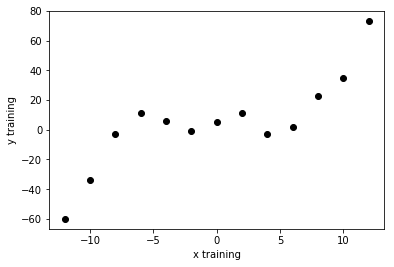

In [11]:
#Plot the training dataset (do not plot the validation dataset yet).
plt.scatter(x_train, y_train,c='black',label='Training Data')

plt.ylabel('y training')
plt.xlabel('x training')
plt.savefig('training_plot.png')
plt.show()

In [12]:
#Use least squares to fit polynomial models of increasing degree, from degree zero (constant) to degree 7.


Model:0 RMSE Training: 30.1789534406, RMSE Testing: 37.5399786894
Model:1 RMSE Training: 16.9665276358, RMSE Testing: 20.8239015804
Model:2 RMSE Training: 16.9645301038, RMSE Testing: 20.8295925819
Model:3 RMSE Training: 5.14462323561, RMSE Testing: 10.0887955201
Model:4 RMSE Training: 5.13419353202, RMSE Testing: 9.95279270807
Model:5 RMSE Training: 5.12480999638, RMSE Testing: 9.84129525868
Model:6 RMSE Training: 4.92035112165, RMSE Testing: 9.4175375227
Model:7 RMSE Training: 4.32451123662, RMSE Testing: 9.92153365616


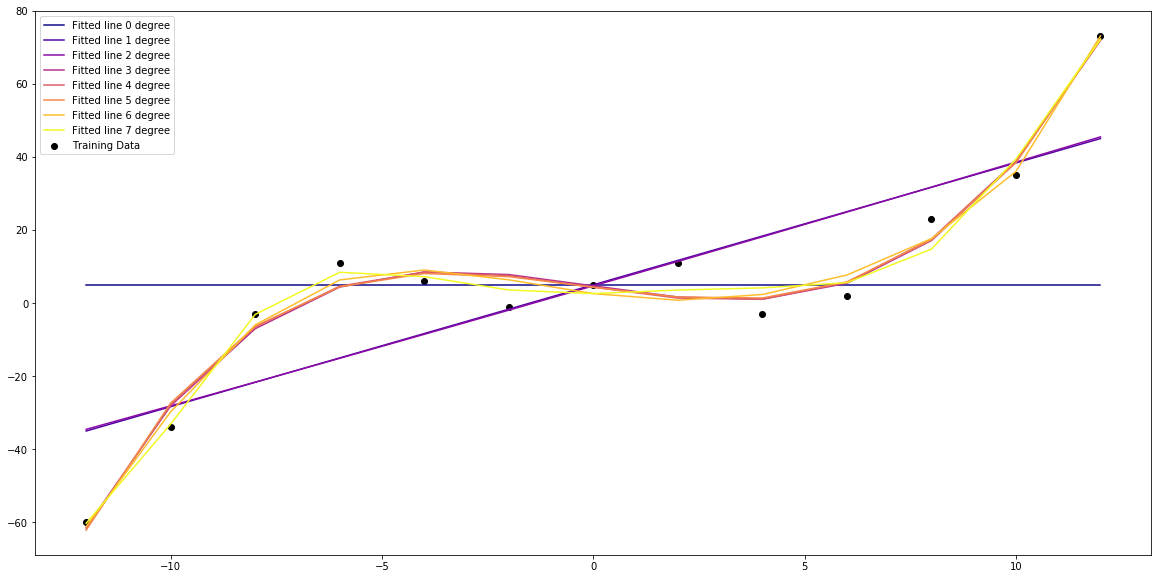

In [13]:
poly_list = [] #List of differt poly functions
poly_params = [] #Stores the best parameters for each poly 
rmse_train = [] #Stores RMSE per model  for  training set 
rmse_test = [] #Stores RMS per  model for  testing set

#Defining polynomials
def func0(x,a0):
    return a0 
def func1(x,a0,a1):
    return a0 + a1 *x
def func2(x,a0,a1,a2):
    return a0 + a1 *x + a2 *x**2
def func3(x,a0,a1,a2,a3):
    return a0 + a1 *x + a2 *x**2 + a3 *x**3
def func4(x,a0,a1,a2,a3,a4):
    return a0 + a1 *x + a2 *x**2 + a3 *x**3 + a4*x**4
def func5(x,a0,a1,a2,a3,a4,a5):
    return a0 + a1 *x + a2 *x**2 + a3 *x**3 + a4*x**4 + a5*x**5
def func6(x,a0,a1,a2,a3,a4,a5,a6):
    return a0 + a1 *x + a2 *x**2 + a3 *x**3 + a4*x**4 + a5*x**5 + a6*x**6
def func7(x,a0,a1,a2,a3,a4,a5,a6,a7):
    return a0 + a1 *x + a2 *x**2 + a3 *x**3 + a4*x**4 + a5*x**5 + a6*x**6 + a7*x**7

poly_list.append(func0)
poly_list.append(func1)
poly_list.append(func2)
poly_list.append(func3)
poly_list.append(func4)
poly_list.append(func5)
poly_list.append(func6)
poly_list.append(func7)

#Special configurations for plotting
plt.figure(figsize=(20,10))
plt.scatter(x_train, y_train,c='black',label='Training Data')
color=iter(cm.plasma(np.linspace(0,1,len(poly_list))))

#The main loop
for i in range(len(poly_list)):
    x = np.zeros(i+1) #Initial parameters 
    sigma = np.ones(len(x_train)) #Error for each parameter
    func = poly_list[i] #Select the poly function 
    res =  optimization.curve_fit(func, x_train, y_train, x, sigma) #Least square fitting
    params = res[0] #Best parameters for this poly
    poly_params.append(params)
    c=next(color) #Select color 
    if i == 0: #Special case
        a0_0= res[0][0]
        plt.plot(x_train, a0_0 * np.ones(13), c=c, label='Fitted line 0 degree')
    else:
        plt.plot(x_train, func(x_train,*params), c=c, label='Fitted line ' + str(i)+" degree")
        
    
    #RMSE for training 
    errsum = 0 
    for k in range(len(x_train)):
        errsum = errsum+  (y_train[k]- func(x_train[k],*params))**2
    rmset = (errsum/(1.0 * len(x_train)))**0.5
    rmse_train.append(rmset)

    #RMSE for validation 
    errsum0 = 0
    for k in range(len(x_test)):
        errsum = errsum + (y_test[k]- func(x_test[k],*params))**2
    rmsev = (errsum/(1.0 * len(x_test)))**0.5
    rmse_test.append(rmsev)
    
    print("Model:"+ str(i)+" RMSE Training: " + str(rmset)+ ", RMSE Testing: "+str(rmsev))

plt.legend()
plt.savefig('m_poly.png')
plt.show()


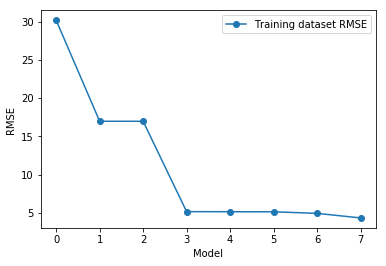

In [14]:
#Plot the root mean squared error of the model, i.e. the square root of the average of the squared errors between the model and the actual data, as a function of the order of the polynomial, using the data from the training dataset.

models = []
for i in range(len(rmse_train)):
    models.append(i)
plt.plot(models,rmse_train,label = 'Training dataset RMSE',marker='o')
plt.ylabel('RMSE ')
plt.xlabel('Model')
plt.legend()
plt.savefig('rmse_train_plot.png')
plt.show()

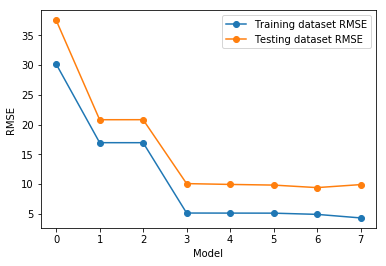

In [15]:
#Now use the same polynomial model fits (that you computed for question 2) to determine the root mean square error on the model, using the validation dataset. Which polynomial order is best? 

models = []
for i in range(len(rmse_train)):
    models.append(i)
plt.plot(models,rmse_train,label = 'Training dataset RMSE',marker='o')
plt.plot(models,rmse_test,label = 'Testing dataset RMSE',marker='o')

plt.ylabel('RMSE ')
plt.xlabel('Model')
plt.legend()
plt.savefig('rmse_train__test_plot.png')
plt.show()

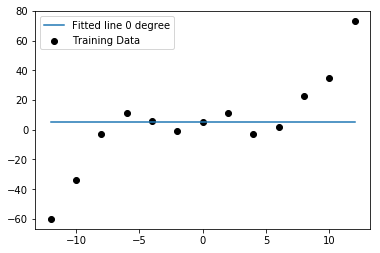

In [19]:
#Plot, on the same graph an example of polynomial model that clearly under-fits the data, and an example of model that clearly over-fits the  data.
#Underfit  = 0 degree
plt.scatter(x_train, y_train,c='black',label='Training Data')
plt.plot(x_train, poly_params[0] * np.ones(13), label='Fitted line 0 degree')
plt.legend()
plt.savefig('under.png')
plt.show()


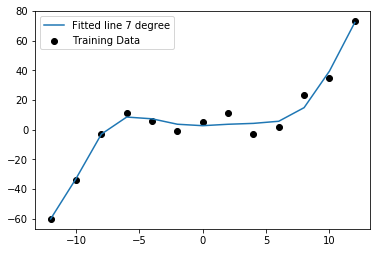

In [21]:
#overfit  = 7 degree
plt.scatter(x_train, y_train,c='black',label='Training Data')
plt.plot(x_train, func7(x_train,*params), label='Fitted line ' + str(7)+" degree")
plt.savefig('over.png')
plt.legend()
plt.show()
